**1. Project Background**

The energy industry is acutely vulnerable to geopolitical disruptions, with sudden supply shocks frequently triggering price swings exceeding 30% within weeks (EIA, 2024). Traditional risk assessments remain reactive, relying on qualitative analyst reports that fail to quantify how governance fundamentals impact production stability.

This project introduces a Geopolitical Risk Index (GRI)—a data-driven framework that systematically measures:
1. Core risk drivers: Political stability, rule of law, and corruption control, weighted by their demonstrated impact on oil production continuity.
2. Market exposure: Country risk scores scaled to actual oil production volumes, translating vulnerabilities into millions of barrels per day (bpd) at risk.

By integrating these metrics, the GRI enables energy firms to optimize sourcing, trading and investment strategies with actionable, quantifiable insights into geopolitical risk.

**2. Load Libraries & Data**

In [456]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [457]:
#Load Dataset 1
world_bank =pd.read_excel(r'C:\Users\Work\Desktop\Geopolitical_Risk_Index\Datasets\wgidataset.xlsx')
world_bank.head(10)

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,27.419355
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,43.010754
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,52.688171
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,..
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,96.774193
5,AGOcc1996,AGO,Angola,1996,cc,-1.167702,0.262077,4,9.67742,0.537634,27.419355
6,AIAcc1996,AIA,Anguilla,1996,cc,..,..,..,..,..,..
7,ATGcc1996,ATG,Antigua and Barbuda,1996,cc,0.869897,0.480889,1,80.107529,59.139786,91.39785
8,ARGcc1996,ARG,Argentina,1996,cc,-0.101317,0.210325,6,53.763439,38.709679,62.903225
9,ARMcc1996,ARM,Armenia,1996,cc,-0.473051,0.340507,2,38.172043,15.053763,59.139786


**3. Exploratory Data Analysis**

In [458]:
world_bank.columns.to_list()

['codeindyr',
 'code',
 'countryname',
 'year',
 'indicator',
 'estimate',
 'stddev',
 'nsource',
 'pctrank',
 'pctranklower',
 'pctrankupper']

In [459]:
world_bank.shape

(32100, 11)

In [460]:
# Filter Political Stability (pv), Rule of Law (rl), and Control of Corruption (cc)
filtered_world_bank = world_bank[world_bank['indicator'].isin(['pv', 'rl', 'cc'])]
filtered_world_bank.head(15)

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,27.419355
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,43.010754
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,52.688171
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,..
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,96.774193
5,AGOcc1996,AGO,Angola,1996,cc,-1.167702,0.262077,4,9.67742,0.537634,27.419355
6,AIAcc1996,AIA,Anguilla,1996,cc,..,..,..,..,..,..
7,ATGcc1996,ATG,Antigua and Barbuda,1996,cc,0.869897,0.480889,1,80.107529,59.139786,91.39785
8,ARGcc1996,ARG,Argentina,1996,cc,-0.101317,0.210325,6,53.763439,38.709679,62.903225
9,ARMcc1996,ARM,Armenia,1996,cc,-0.473051,0.340507,2,38.172043,15.053763,59.139786


In [461]:
filtered_world_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16050 entries, 0 to 31671
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codeindyr     16050 non-null  object
 1   code          16050 non-null  object
 2   countryname   16050 non-null  object
 3   year          16050 non-null  int64 
 4   indicator     16050 non-null  object
 5   estimate      16050 non-null  object
 6   stddev        16050 non-null  object
 7   nsource       16050 non-null  object
 8   pctrank       16050 non-null  object
 9   pctranklower  16050 non-null  object
 10  pctrankupper  16050 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [462]:
#Check for missing values
filtered_world_bank.isnull().sum()

codeindyr       0
code            0
countryname     0
year            0
indicator       0
estimate        0
stddev          0
nsource         0
pctrank         0
pctranklower    0
pctrankupper    0
dtype: int64

In [463]:
#check for duplicates
filtered_world_bank.duplicated().value_counts()

False    16050
Name: count, dtype: int64

In [464]:
#check for data types
filtered_world_bank.dtypes

codeindyr       object
code            object
countryname     object
year             int64
indicator       object
estimate        object
stddev          object
nsource         object
pctrank         object
pctranklower    object
pctrankupper    object
dtype: object

In [465]:
#Drop columns
columns_to_drop = ['code', 'nsource', 'pctranklower', 'pctrankupper']
filtered_world_bank = filtered_world_bank.drop(columns=columns_to_drop, errors='ignore')
filtered_world_bank.head()

,codeindyr,countryname,year,indicator,estimate,stddev,pctrank
0,AFGcc1996,Afghanistan,1996,cc,-1.291705,0.340507,4.301075
1,ALBcc1996,Albania,1996,cc,-0.893903,0.315914,19.354839
2,DZAcc1996,Algeria,1996,cc,-0.566741,0.262077,33.333332
3,ASMcc1996,American Samoa,1996,cc,..,..,..
4,ADOcc1996,Andorra,1996,cc,1.318143,0.480889,87.096771


In [466]:
#Convert columns to numeric
numeric_cols = ['estimate', 'pctrank', 'stddev']
filtered_world_bank[numeric_cols] = filtered_world_bank[numeric_cols].apply(pd.to_numeric, errors='coerce')
filtered_world_bank.dtypes

codeindyr       object
countryname     object
year             int64
indicator       object
estimate       float64
stddev         float64
pctrank        float64
dtype: object

In [467]:
#Pivot/Reshape the data
clean_wb_df = filtered_world_bank.pivot(
    index=['countryname', 'year'],
    columns='indicator',
    values=['estimate', 'pctrank']
)

clean_wb_df.columns = [f'{ind}_{metric}' for metric, ind in clean_wb_df.columns]
clean_wb_df.reset_index(inplace=True)
clean_wb_df.head(10)

,countryname,year,cc_estimate,pv_estimate,rl_estimate,cc_pctrank,pv_pctrank,rl_pctrank
0,Afghanistan,1996,-1.291705,-2.417310,-1.788075,4.301075,2.127660,1.507538
1,Afghanistan,1998,-1.176012,-2.427355,-1.734887,8.021390,0.531915,2.000000
2,Afghanistan,2000,-1.271724,-2.438969,-1.780661,4.787234,0.529101,1.492537
3,Afghanistan,2002,-1.251137,-2.035034,-1.673473,4.761905,1.587302,1.990050
4,Afghanistan,2003,-1.344180,-2.198372,-1.558294,4.761905,2.010050,2.985075
5,Afghanistan,2004,-1.350647,-2.295682,-1.693925,6.403941,1.941748,2.403846
6,Afghanistan,2005,-1.447252,-2.067510,-1.662966,1.463415,2.427185,2.392344
7,Afghanistan,2006,-1.446292,-2.219135,-1.879005,1.951220,1.449275,0.478469
8,Afghanistan,2007,-1.613251,-2.413373,-1.852560,0.970874,1.449275,0.478469
9,Afghanistan,2008,-1.672096,-2.691361,-1.903308,0.485437,0.480769,0.480769


**4. Calculate Risk Scores**

In [468]:
#Calculate Risk Scores
#Invert Political Stability
clean_wb_df['pv_risk'] = -1 * clean_wb_df['pv_estimate']
"""
The Higher the pv = more stable, but we want higher = riskier
"""

'\nThe Higher the pv = more stable, but we want higher = riskier\n'

In [469]:
# Normalize All Scores to 0–100
def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

clean_wb_df['pv_risk_norm'] = normalize(clean_wb_df['pv_risk'])
clean_wb_df['rl_risk_norm'] = normalize(-1 * clean_wb_df['rl_estimate'])  # Lower rule of law = higher risk
clean_wb_df['cc_risk_norm'] = normalize(-1 * clean_wb_df['cc_estimate'])  # Lower corruption control = higher risk

In [470]:
#Weighted Composite Risk Score
weights = {
    'pv': 0.40,  # Political stability (most critical for energy projects)
    'rl': 0.30,  # Rule of law (contract enforcement)
    'cc': 0.30   # Corruption control (bribes, permits)
}

clean_wb_df['composite_risk'] = (
    weights['pv'] * clean_wb_df['pv_risk_norm'] + 
    weights['rl'] * clean_wb_df['rl_risk_norm'] + 
    weights['cc'] * clean_wb_df['cc_risk_norm']
)

In [471]:
#Rank Countries by Risk
clean_wb_df = clean_wb_df.sort_values('composite_risk', ascending=False)  # Highest risk first

In [472]:
#Categorize Risk Tiers
conditions = [
    clean_wb_df['composite_risk'] <= 30, #Low
    clean_wb_df['composite_risk'] <= 60, #Moderate
    clean_wb_df['composite_risk'] > 60   #High
]
choices = ['Low', 'Moderate', 'High']
clean_wb_df['risk_tier'] = pd.cut(clean_wb_df['composite_risk'], bins=[0, 30, 60, 100], labels=choices)

In [473]:
clean_wb_df.head(25)

,countryname,year,cc_estimate,pv_estimate,rl_estimate,cc_pctrank,pv_pctrank,rl_pctrank,pv_risk,pv_risk_norm,rl_risk_norm,cc_risk_norm,composite_risk,risk_tier
4334,Somalia,2008,-1.848734,-3.280517,-2.590877,0.000000,0.000000,0.000000,3.280517,99.385394,100.000000,97.271847,98.935712,High
4335,Somalia,2009,-1.701694,-3.312951,-2.450297,0.000000,0.000000,0.000000,3.312951,100.000000,97.018847,93.951660,97.291152,High
4333,Somalia,2007,-1.739551,-3.228497,-2.419230,0.000000,0.000000,0.000000,3.228497,98.399631,96.360046,94.806477,96.709809,High
4336,Somalia,2010,-1.726097,-3.130971,-2.406264,0.000000,0.000000,0.000000,3.130971,96.551562,96.085080,94.502688,95.796955,High
4337,Somalia,2011,-1.715412,-3.083847,-2.338279,0.000000,0.000000,0.000000,3.083847,95.658566,94.643387,94.261412,94.934866,High
4330,Somalia,2004,-1.803035,-2.878540,-2.288664,0.000000,0.485437,0.000000,2.878540,91.768084,93.591256,96.239952,93.656596,High
4338,Somalia,2012,-1.596589,-2.860755,-2.418204,0.000000,0.000000,0.000000,2.860755,91.431082,96.338291,91.578375,92.947433,High
4332,Somalia,2006,-1.724921,-2.746350,-2.350463,0.000000,0.483092,0.000000,2.746350,89.263153,94.901769,94.476117,92.518627,High
4347,Somalia,2021,-1.795541,-2.727339,-2.282445,0.952381,0.000000,0.476190,2.727339,88.902888,93.459388,96.070743,92.420195,High
4339,Somalia,2013,-1.583604,-2.758687,-2.406621,0.000000,0.000000,0.000000,2.758687,89.496919,96.092664,91.285164,92.012116,High


In [474]:
#Rename first column
clean_wb_df = clean_wb_df.rename(columns={clean_wb_df.columns[0]: 'country'})  # First column = country
clean_wb_df.head()

,country,year,cc_estimate,pv_estimate,rl_estimate,cc_pctrank,pv_pctrank,rl_pctrank,pv_risk,pv_risk_norm,rl_risk_norm,cc_risk_norm,composite_risk,risk_tier
4334,Somalia,2008,-1.848734,-3.280517,-2.590877,0.0,0.0,0.0,3.280517,99.385394,100.000000,97.271847,98.935712,High
4335,Somalia,2009,-1.701694,-3.312951,-2.450297,0.0,0.0,0.0,3.312951,100.000000,97.018847,93.951660,97.291152,High
4333,Somalia,2007,-1.739551,-3.228497,-2.419230,0.0,0.0,0.0,3.228497,98.399631,96.360046,94.806477,96.709809,High
4336,Somalia,2010,-1.726097,-3.130971,-2.406264,0.0,0.0,0.0,3.130971,96.551562,96.085080,94.502688,95.796955,High
4337,Somalia,2011,-1.715412,-3.083847,-2.338279,0.0,0.0,0.0,3.083847,95.658566,94.643387,94.261412,94.934866,High


**5. Load Dataset 2**

In [475]:
#Load Dataset 2

file_path = r"C:\Users\Work\Desktop\Geopolitical_Risk_Index\Datasets\Statistical Review of World Energy Data.xlsx"

# List all available sheets
sheets = pd.ExcelFile(file_path).sheet_names
print("Available sheets:", sheets) 
possible_names = [
    "Oil Production-barrels",
    "Oil Production - barrels",
    "Oil_Production-barrels",
    "Oil Production"  
]

for name in possible_names:
    try:
        df = pd.read_excel(file_path, sheet_name=name)
        print(f"Success! Using sheet: {name}")
        break
    except:
        continue

Available sheets: ['Contents', 'Total Energy Supply (TES) -EJ', 'TES by fuel', 'TES per Capita', 'CO2 from Energy', 'Natural Gas Flaring', 'CO2 from Flaring', 'CO2-Process Emissions, Methane', 'CO2e Emissions ', 'CCUS Capture Capacity', 'Carbon Prices', 'Oil - Proved reserves', 'Oil - Proved reserves history', 'Oil Production - barrels', 'Oil Production - tonnes', 'Crude+cond production - barrels', 'NGLs production - barrels', 'Liquids Consumption - barrels', 'Oil Consumption - barrels', 'Oil Consumption - Tonnes', 'Oil Consumption - EJ', 'Oil - Regional Consumption', 'Spot crude prices', 'Oil crude prices since 1861', 'Oil refinery - throughput', 'Oil refinery - capacity', 'Oil - Regional refining margins', 'Oil trade movements', 'Oil - Inter-area movements', 'Oil - Trade movements in 23-24', 'Gas - Proved reserves', 'Gas - Proved reserves history ', 'Gas Production - Bcm', 'Gas Production - bcf', 'Gas Production - EJ', 'Gas Consumption - Bcm', 'Gas Consumption - Bcf', 'Gas Consumptio

In [476]:
oil_producing_countries= pd.read_excel(file_path,'Oil Production - barrels' )
oil_producing_countries.head()

,Oil: Production*,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Growth rate per annum,NaN,Share
1,Thousand barrels daily,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000,2024.000000,2024,2014-24,2024
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canada,920.0,1012.0,1106.0,1194.0,1306.0,1473.0,1582.0,1829.0,2114.0,...,5243.879959,5370.800637,5128.318327,5413.763836,5574.555231,5647.625892,5888.011172,0.042564,0.032639,0.06077
4,Mexico,362.0,370.0,411.0,439.0,461.0,487.0,486.0,506.0,525.0,...,2068.371301,1918.142844,1909.906448,1926.317482,1943.042608,2039.800359,1910.924309,-0.063181,-0.036938,0.019723


**6. Exploratory Data Analysis**

In [477]:
oil_producing_countries.columns.to_list()


['Oil: Production*',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 6

In [478]:
oil_producing_countries.iloc[1]

Oil: Production*    Thousand barrels daily
Unnamed: 1                          1965.0
Unnamed: 2                          1966.0
Unnamed: 3                          1967.0
Unnamed: 4                          1968.0
                             ...          
Unnamed: 59                         2023.0
Unnamed: 60                         2024.0
Unnamed: 61                           2024
Unnamed: 62                        2014-24
Unnamed: 63                           2024
Name: 1, Length: 64, dtype: object

In [479]:
# Check for non-numeric/missing values
print("Non-numeric values per column:")
print(oil_producing_countries.isna().sum())
print("\nUnique values sample:", oil_producing_countries.iloc[:, 1].unique()[:10])  # Check first year column

Non-numeric values per column:
Oil: Production*     9
Unnamed: 1          18
Unnamed: 2          18
Unnamed: 3          18
Unnamed: 4          18
                    ..
Unnamed: 59         18
Unnamed: 60         18
Unnamed: 61         17
Unnamed: 62         18
Unnamed: 63         17
Length: 64, dtype: int64

Unique values sample: [           nan 1.96500000e+03 9.20000000e+02 3.62000000e+02
 9.01414800e+03 1.02961480e+04 2.75673973e+02 9.60500000e+01
 2.03000000e+02 8.00000000e+00]


In [480]:
for col in oil_producing_countries.columns[1:]:  # Skip 'Country' column
    # Convert to string, remove commas/letters
    oil_producing_countries[col] = oil_producing_countries[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    
    # Convert to float (handles 'nan' properly)
    oil_producing_countries[col] = pd.to_numeric(oil_producing_countries[col], errors='coerce')
    
    # Fill NA and convert to int
    oil_producing_countries[col] = oil_producing_countries[col].fillna(0).astype(int)

oil_producing_countries.head()

,Oil: Production*,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Thousand barrels daily,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2024,201424,2024
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Canada,920,1012,1106,1194,1306,1473,1582,1829,2113,...,5243,5370,5128,5413,5574,5647,5888,0,0,0
4,Mexico,362,370,411,439,461,487,486,506,525,...,2068,1918,1909,1926,1943,2039,1910,0,0,0


In [481]:
#Rename columns
filtered_oil_df= oil_producing_countries.columns = ['country','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024','2024_growth_per_annum','2014-24','2024_share']
filtered_oil_df= oil_producing_countries.drop([0,1,2])# Drop the first three rows
filtered_oil_df.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2024_growth_per_annum,2014-24,2024_share
3,Canada,920,1012,1106,1194,1306,1473,1582,1829,2113,...,5243,5370,5128,5413,5574,5647,5888,0,0,0
4,Mexico,362,370,411,439,461,487,486,506,525,...,2068,1918,1909,1926,1943,2039,1910,0,0,0
5,US,9014,9579,10219,10599,10827,11296,11155,11184,10945,...,15328,17138,16497,16733,17925,19433,20135,0,0,0
6,Total North America,10296,10961,11736,12232,12594,13256,13223,13519,13584,...,22641,24427,23535,24073,25442,27120,27934,0,0,0
7,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [482]:
# Clean year columns (remove units, whitespace)
filtered_oil_df.columns = [str(col).strip().replace(' (kb/d)', '') if isinstance(col, str) else col 
              for col in filtered_oil_df.columns]

filtered_oil_df.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2024_growth_per_annum,2014-24,2024_share
3,Canada,920,1012,1106,1194,1306,1473,1582,1829,2113,...,5243,5370,5128,5413,5574,5647,5888,0,0,0
4,Mexico,362,370,411,439,461,487,486,506,525,...,2068,1918,1909,1926,1943,2039,1910,0,0,0
5,US,9014,9579,10219,10599,10827,11296,11155,11184,10945,...,15328,17138,16497,16733,17925,19433,20135,0,0,0
6,Total North America,10296,10961,11736,12232,12594,13256,13223,13519,13584,...,22641,24427,23535,24073,25442,27120,27934,0,0,0
7,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [483]:
# Remove footnotes and empty rows
clean_oil_df = filtered_oil_df.dropna(subset=['country']).reset_index(drop=True)

In [484]:
#Remove aggregates and regional totals
aggregates = [
    'Other S. & Cent. America','Other Europe','Other CIS',
    'Other Middle East','Other Africa','European Union #',
    'Other Asia Pacific','Total World','Total North America',
    'Total North America','Total S. & Cent. America',
    'Total Europe','Total CIS','Total Middle East',
    'Total Africa','Total Asia Pacific','Total World',
    'of which: OECD','Non-OECD','OPEC','Non-OPEC'
]
# Filter out aggregates
pattern = '|'.join(aggregates)
is_country = ~filtered_oil_df['country'].str.contains(pattern, case=False, na=False)
clean_oil_df = filtered_oil_df[is_country].copy()

print("Remaining countries:", clean_oil_df['country'].unique()[:])

Remaining countries: ['Canada' 'Mexico' 'US' nan 'Argentina' 'Brazil' 'Colombia' 'Ecuador'
 'Guyana' 'Peru' 'Trinidad & Tobago' 'Venezuela' 'Denmark' 'Italy'
 'Norway' 'Romania' 'United Kingdom' 'Azerbaijan' 'Kazakhstan'
 'Russian Federation' 'Turkmenistan' 'USSR' 'Uzbekistan' 'Iran' 'Iraq'
 'Kuwait' 'Oman' 'Qatar' 'Saudi Arabia' 'Syria' 'United Arab Emirates'
 'Yemen' 'Algeria' 'Angola' 'Chad' 'Republic of Congo ' 'Egypt'
 'Equatorial Guinea' 'Gabon' 'Libya' 'Nigeria' 'South Sudan' 'Sudan'
 'Tunisia' 'Australia' 'Brunei' 'China' 'India' 'Indonesia' 'Malaysia'
 'Thailand' 'Vietnam' 'Source: includes data from FGE Iran Service.'
 '* Includes crude oil, shale oil, oil sands, condensates (lease condensate or gas condensates that require further refining) and NGLs (natural gas liquids - ethane, LPG and naphtha separated from the production of natural gas). '
 'Excludes liquid fuels from other sources such as biofuels and synthetic derivatives of coal and natural gas. This also excludes liq

In [485]:
clean_oil_df.tail(10)

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2024_growth_per_annum,2014-24,2024_share
73,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,Source: includes data from FGE Iran Service.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,"* Includes crude oil, shale oil, oil sands, co...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,Excludes liquid fuels from other sources such ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,^ Less than 0.05.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,♦ Less than 0.05%,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,n/a not available.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,"USSR includes CIS, Georgia, Ukraine and the Ba...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,"# Excludes Estonia, Latvia and Lithuania prio...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,Note: Annual changes and shares of total are c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [486]:
#Drop rows the last 9 rows
clean_oil_df=clean_oil_df[:-9]
clean_oil_df.tail()


,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2024_growth_per_annum,2014-24,2024_share
67,Indonesia,486,474,510,599,641,854,892,1080,1338,...,807,780,742,691,646,638,612,0,0,0
68,Malaysia,1,1,1,4,9,18,69,93,91,...,712,671,614,571,560,556,535,0,0,0
69,Thailand,0,0,0,0,0,0,0,0,0,...,475,474,420,398,328,323,352,0,0,0
70,Vietnam,0,0,0,0,0,0,0,0,0,...,256,236,207,196,193,188,176,0,0,0
73,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [487]:
#Identify year columns (1965-2024)
year_cols = [col for col in clean_oil_df.columns 
            if str(col).strip().isdigit() 
            and 1965 <= int(col) <= 2024]

print("Valid Year Columns:", year_cols)

Valid Year Columns: ['1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [488]:
oil_melted = clean_oil_df.melt(
    id_vars=['country'],
    value_vars=year_cols,
    var_name='year',
    value_name='oil_production_kbd'  # Unique name
)

In [489]:
#convert data types
oil_melted['year'] = oil_melted['year'].astype(int)  # Years as integers
oil_melted['oil_production_kbd'] = (
    oil_melted['oil_production_kbd']
    .astype(str)
    .str.replace('[^\d.]', '', regex=True)  # Remove all non-numeric
    .replace('', '0')  # Handle empty strings
    .astype(float)  # Convert to numbers
)

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Work\AppData\Local\Temp\ipykernel_11372\2543418156.py:6: SyntaxWarning: invalid escape sequence '\d'
  .str.replace('[^\d.]', '', regex=True)  # Remove all non-numeric


In [490]:
#Drop NaN values
oil_melted = oil_melted.dropna()


In [491]:
oil_melted.head(10)

,country,year,oil_production_kbd
0,Canada,1965,920.0
1,Mexico,1965,362.0
2,US,1965,9014.0
4,Argentina,1965,275.0
5,Brazil,1965,96.0
6,Colombia,1965,203.0
7,Ecuador,1965,8.0
8,Guyana,1965,0.0
9,Peru,1965,66.0
10,Trinidad & Tobago,1965,135.0


In [492]:
oil_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3060 entries, 0 to 3478
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             3060 non-null   object 
 1   year                3060 non-null   int64  
 2   oil_production_kbd  3060 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 95.6+ KB


In [493]:
#check for missing values
oil_melted.isnull().sum()


country               0
year                  0
oil_production_kbd    0
dtype: int64

In [494]:
#check for data types
oil_melted.dtypes


country                object
year                    int64
oil_production_kbd    float64
dtype: object

In [495]:
oil_melted.head()

,country,year,oil_production_kbd
0,Canada,1965,920.0
1,Mexico,1965,362.0
2,US,1965,9014.0
4,Argentina,1965,275.0
5,Brazil,1965,96.0


**7. Merge Datasets**

In [496]:
#check column names
print("clean_wb_df:", clean_wb_df.columns.tolist())
print("oil_melted:", oil_melted.columns.tolist())

clean_wb_df: ['country', 'year', 'cc_estimate', 'pv_estimate', 'rl_estimate', 'cc_pctrank', 'pv_pctrank', 'rl_pctrank', 'pv_risk', 'pv_risk_norm', 'rl_risk_norm', 'cc_risk_norm', 'composite_risk', 'risk_tier']
oil_melted: ['country', 'year', 'oil_production_kbd']


In [497]:
# Standardize oil_melted names to match clean_wb_df
oil_melted = oil_melted.rename(columns={
    'country': 'country',
    'year': 'year'
})
# Ensure year is integer in both datasets
oil_melted['year'] = oil_melted['year'].astype(int)
clean_wb_df['year'] = clean_wb_df['year'].astype(int)

In [498]:
print("clean_wb_df:",clean_wb_df['country'].unique()[:])

clean_wb_df: ['Somalia' 'Syrian Arab Republic' 'Iraq' 'Yemen, Rep.' 'South Sudan'
 'Afghanistan' 'Congo, Dem. Rep.' 'Libya' 'Liberia' 'Sudan'
 'Central African Republic' 'Venezuela, RB' 'Guinea' 'Haiti' 'Chad'
 "Côte d'Ivoire" 'Angola' 'Burundi' 'Tajikistan' 'Myanmar' 'Pakistan'
 'Guinea-Bissau' 'Mali' 'Uzbekistan' 'Serbia' 'Nigeria' 'Georgia'
 'Zimbabwe' 'Bangladesh' 'Congo, Rep.' 'Sierra Leone' 'Rwanda' 'Algeria'
 'Indonesia' 'Iran, Islamic Rep.' 'Korea, Dem. Rep.' 'Kyrgyz Republic'
 'Ukraine' 'Nepal' 'Cameroon' 'Lebanon' 'Eritrea' 'Paraguay' 'Kenya'
 'Colombia' 'Ethiopia' 'Lao PDR' 'Russian Federation' 'Cambodia'
 'Azerbaijan' 'Togo' 'West Bank and Gaza' 'Philippines' 'Nicaragua'
 'Uganda' 'Mozambique' 'Turkmenistan' 'Equatorial Guinea' 'Burkina Faso'
 'Egypt, Arab Rep.' 'Papua New Guinea' 'Niger' 'Guatemala' 'Comoros'
 'Timor-Leste' 'Mauritania' 'Honduras' 'Türkiye' 'Bolivia' 'Ecuador'
 'Madagascar' 'Kazakhstan' 'Belarus' 'Djibouti' 'Mexico' 'North Macedonia'
 'Albania' 'Kosovo' 'P

In [499]:
print("oil_melted:", oil_melted['country'].unique()[:])

oil_melted: ['Canada' 'Mexico' 'US' 'Argentina' 'Brazil' 'Colombia' 'Ecuador' 'Guyana'
 'Peru' 'Trinidad & Tobago' 'Venezuela' 'Denmark' 'Italy' 'Norway'
 'Romania' 'United Kingdom' 'Azerbaijan' 'Kazakhstan' 'Russian Federation'
 'Turkmenistan' 'USSR' 'Uzbekistan' 'Iran' 'Iraq' 'Kuwait' 'Oman' 'Qatar'
 'Saudi Arabia' 'Syria' 'United Arab Emirates' 'Yemen' 'Algeria' 'Angola'
 'Chad' 'Republic of Congo ' 'Egypt' 'Equatorial Guinea' 'Gabon' 'Libya'
 'Nigeria' 'South Sudan' 'Sudan' 'Tunisia' 'Australia' 'Brunei' 'China'
 'India' 'Indonesia' 'Malaysia' 'Thailand' 'Vietnam']


In [500]:
#country_mapping
country_map = {
    # oil_melted : clean_wb-df Name
    'US':'United States',
    'Iran':'Iran, Islamic Rep.',
    'Brunei':'Brunei Darussalam',
    'Egypt':'Egypt, Arab Rep.',
    'Republic of Congo ':'Congo, Rep.',
    'Vietnam':'Viet Nam',
    'Venezuela':'Venezuela, RB',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'Yemen':'Yemen, Rep.',
    'Syria':'Syrian Arab Republic',
    'Korea, Republic of': 'South Korea'
}

oil_melted['country'] = oil_melted['country'].replace(country_map)

In [501]:
merged = pd.merge(
    left=clean_wb_df,             #primary dataset (World Bank)
    right=oil_melted,             # add oil production
    on=['country', 'year'],       # merge keys
    how='left'                    # Keep all World bank data rows
)

# Fill missing production with 0 (for countries without oil data)
merged['oil_production_kbd'] = merged['oil_production_kbd'].fillna(0)

In [502]:
print(f"clean_wb_df rows: {len(clean_wb_df)}")
print(f"Merged rows: {len(merged)}")  # match clean_wb_df count

# Check unmatched oil producers
unmatched_oil = oil_melted[~oil_melted['country'].isin(clean_wb_df['country'])]
print("Oil countries not in Worldbank Data:", unmatched_oil['country'].unique())

# Verify merged columns
print("Final columns:", merged.columns.tolist())
# To include Worldbank Data metrics + oil_production

clean_wb_df rows: 5350
Merged rows: 5350
Oil countries not in Worldbank Data: ['USSR']
Final columns: ['country', 'year', 'cc_estimate', 'pv_estimate', 'rl_estimate', 'cc_pctrank', 'pv_pctrank', 'rl_pctrank', 'pv_risk', 'pv_risk_norm', 'rl_risk_norm', 'cc_risk_norm', 'composite_risk', 'risk_tier', 'oil_production_kbd']


In [503]:
merged.head(30)

,country,year,cc_estimate,pv_estimate,rl_estimate,cc_pctrank,pv_pctrank,rl_pctrank,pv_risk,pv_risk_norm,rl_risk_norm,cc_risk_norm,composite_risk,risk_tier,oil_production_kbd
0,Somalia,2008,-1.848734,-3.280517,-2.590877,0.000000,0.000000,0.000000,3.280517,99.385394,100.000000,97.271847,98.935712,High,0.0
1,Somalia,2009,-1.701694,-3.312951,-2.450297,0.000000,0.000000,0.000000,3.312951,100.000000,97.018847,93.951660,97.291152,High,0.0
2,Somalia,2007,-1.739551,-3.228497,-2.419230,0.000000,0.000000,0.000000,3.228497,98.399631,96.360046,94.806477,96.709809,High,0.0
3,Somalia,2010,-1.726097,-3.130971,-2.406264,0.000000,0.000000,0.000000,3.130971,96.551562,96.085080,94.502688,95.796955,High,0.0
4,Somalia,2011,-1.715412,-3.083847,-2.338279,0.000000,0.000000,0.000000,3.083847,95.658566,94.643387,94.261412,94.934866,High,0.0
5,Somalia,2004,-1.803035,-2.878540,-2.288664,0.000000,0.485437,0.000000,2.878540,91.768084,93.591256,96.239952,93.656596,High,0.0
6,Somalia,2012,-1.596589,-2.860755,-2.418204,0.000000,0.000000,0.000000,2.860755,91.431082,96.338291,91.578375,92.947433,High,0.0
7,Somalia,2006,-1.724921,-2.746350,-2.350463,0.000000,0.483092,0.000000,2.746350,89.263153,94.901769,94.476117,92.518627,High,0.0
8,Somalia,2021,-1.795541,-2.727339,-2.282445,0.952381,0.000000,0.476190,2.727339,88.902888,93.459388,96.070743,92.420195,High,0.0
9,Somalia,2013,-1.583604,-2.758687,-2.406621,0.000000,0.000000,0.000000,2.758687,89.496919,96.092664,91.285164,92.012116,High,0.0


**8. Analysis**

**8.1 Univariate Analysis**

**8.1.1. Major Oil Producers with the Highest Geopolitical Risk**

Highest_Risk_Producers:
| country            |   oil_production_kbd |   composite_risk |
|:-------------------|---------------------:|-----------------:|
| Iraq               |                 2120 |          76.1759 |
| Nigeria            |                 2023 |          64.9497 |
| Venezuela, RB      |                 3447 |          59.9598 |
| Russian Federation |                11679 |          59.7176 |
| Angola             |                 1150 |          58.7761 |
| Algeria            |                 1465 |          57.7518 |
| Iran, Islamic Rep. |                 3850 |          56.6008 |
| Libya              |                 1807 |          50.7766 |
| Kazakhstan         |                 1609 |          50.0883 |
| Mexico             |                 3592 |          49.4248 |


Text(0, 0.5, '')

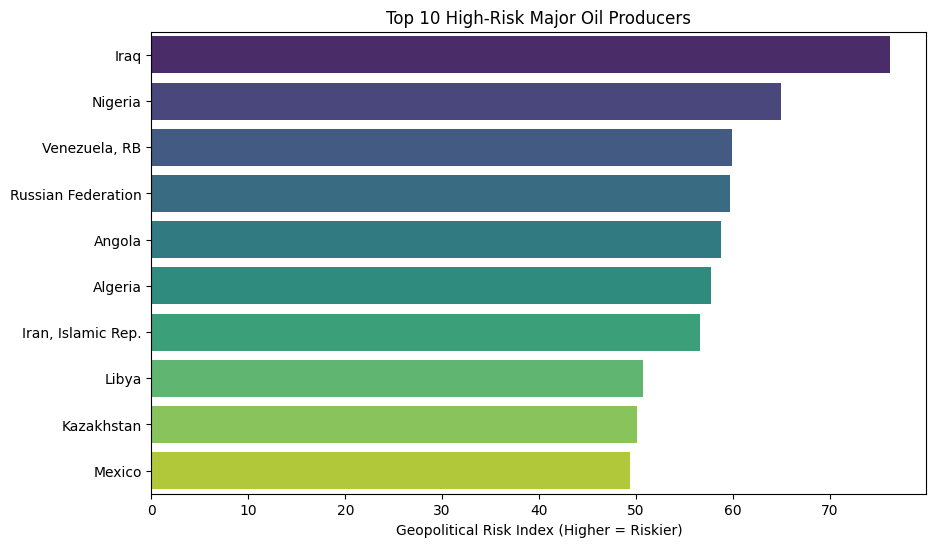

In [504]:
# Unique countries
unique_countries = merged.drop_duplicates('country', keep='last')

# Top 20 producers
top_producers = unique_countries.sort_values('oil_production_kbd', ascending=False).head(20)

# Highest risk Producers
high_risk_producers = top_producers.sort_values('composite_risk', ascending=False)[['country', 'oil_production_kbd', 'composite_risk']]

print("Highest_Risk_Producers:")
print(high_risk_producers.head(10).to_markdown(index=False))

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='composite_risk',y='country', data=high_risk_producers.head(10), palette='viridis', hue='country', legend=False)
plt.title('Top 10 High-Risk Major Oil Producers')
plt.xlabel('Geopolitical Risk Index (Higher = Riskier)')
plt.ylabel('')  

Analysis

1. Which major oil producers have the highest geopolitical risk scores?
2. What percentage of global oil production comes from high-risk (bottom quartile) countries?
3. How has the geopolitical risk profile of OPEC members evolved over time?
(Time-series comparison of OPEC vs non-OPEC risk scores)
4. Is there a statistically significant correlation between geopolitical risk and oil production levels?
5. What's the average production volatility for high-risk vs low-risk producers?
6. Which regions show deteriorating/improving risk profiles for oil production?
7. How does the Middle Eastern geopolitical risk compare to other producing regions?